In [1]:

import networkx as nx
from node2vec import Node2Vec
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
#Extracting dataframes

feat_names = pd.read_csv("facebook/0.featnames")
edges = pd.read_csv("facebook/0.edges")
feat = pd.read_csv("facebook/0.feat")
circles = pd.read_csv("facebook/0.circles")

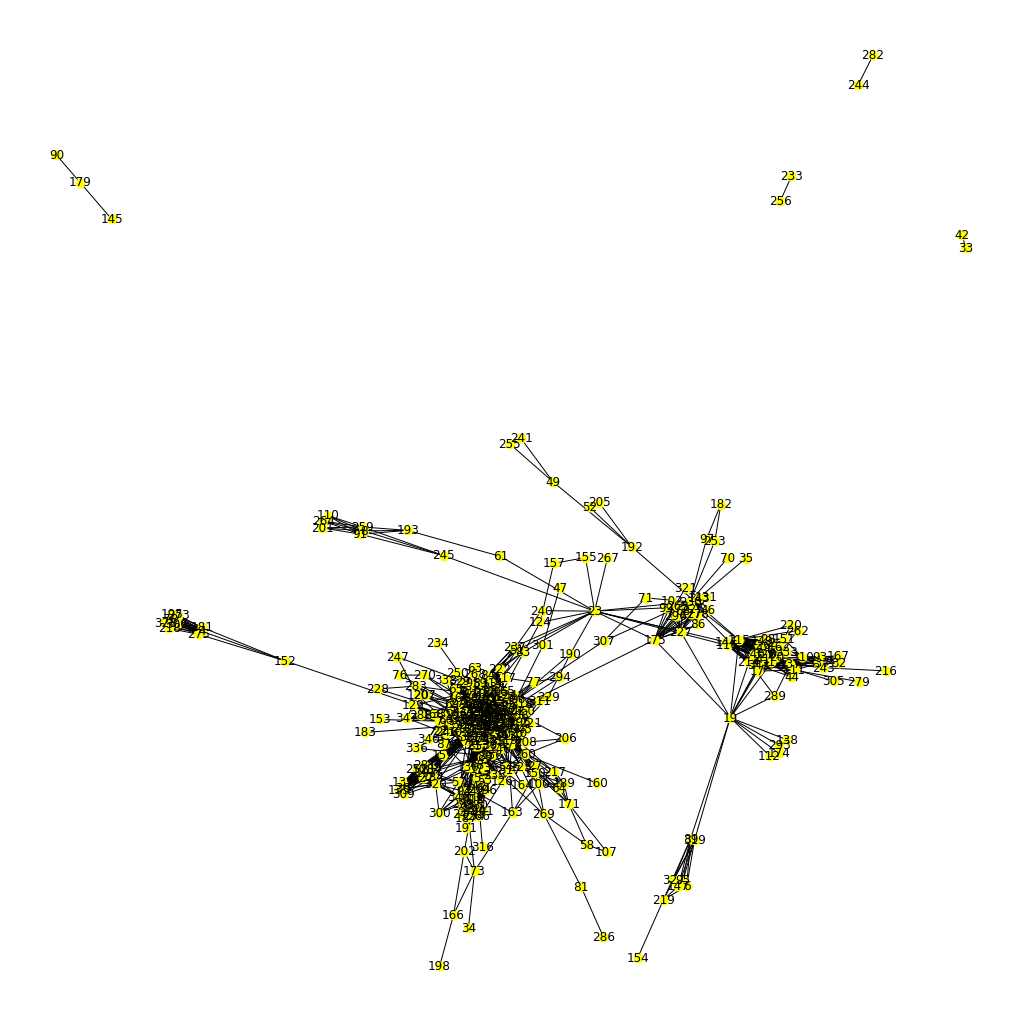

In [3]:
# building the graph

#print(edges)
edge_list = open("facebook/0.edges", "rb")
#print(edge_list)
G = nx.read_edgelist(edge_list)
plt.figure(figsize=(14,14))
nx.draw(G, node_size=80, node_color='yellow', with_labels=True)

        

In [7]:
#Building dataframe for link prediction

# getting nodes and edges for dataframe from graph
print(len(G.nodes))
node_list = list(np.unique(G.nodes))

print(len(G.edges))

entries = []
for edge in edges:
    entries.append([edge[0], edge[1], 1])

for i in range(0, len(node_list)):
    for j in range(i+1, len(node_list)):
            edge = (node_list[i], node_list[j])
            if edge not in edges:
                entries.append([edge[0], edge[1], 0])

                
                


df = pd.DataFrame(entries, columns = ['source_node', 'dest_node', 'edge_exists'])      
print(df)

333
2519
      source_node dest_node  edge_exists
0               2         3            1
1               1        10            0
2               1       100            0
3               1       101            0
4               1       102            0
...           ...       ...          ...
55274          96        98            0
55275          96        99            0
55276          97        98            0
55277          97        99            0
55278          98        99            0

[55279 rows x 3 columns]


In [11]:
# train test split
X = df['source_node'] + df['dest_node']
y = df['edge_exists']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


44223


In [5]:
# get node to vec embeddings
node2vec = Node2Vec(G, dimensions=90, walk_length=5, num_walks=5, workers=4)  # Use temp_folder for big graphs

model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

print(model.wv.most_similar('2'))
print(model)


Computing transition probabilities: 100%|██████████| 333/333 [00:01<00:00, 169.65it/s]


[('236', 0.9485529661178589), ('56', 0.9469318985939026), ('320', 0.9456652402877808), ('82', 0.9451609253883362), ('329', 0.941804051399231), ('343', 0.9417054653167725), ('277', 0.9412615299224854), ('213', 0.940812885761261), ('9', 0.9403989315032959), ('239', 0.9397575855255127)]
Word2Vec(vocab=333, size=90, alpha=0.025)


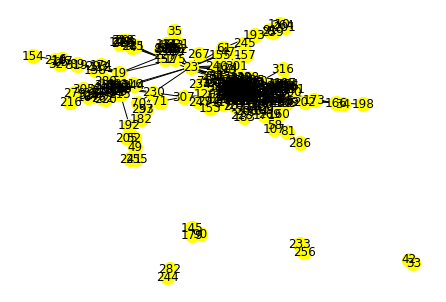

In [6]:
#draw graph function
nx.draw(G, node_size=200, node_color='yellow', with_labels=True)